# Exploration of Support Vector Machines
## Support Vector Machine on Categorical Data using Sklearn Library 
In this exploration I will create a support vector machine using the sklearn library. The data in this project is about wine and how they are rated by consumers. The scale is 1-10 but this is a binary classification so the data will need to be modified. Each datapoint contains several features of the wine and finally the rating given by a consumer.

SVM's fix the problem of high bias in traditional support vector classifiers/ maximal margin classifiers. However, since this dummy data set is very small and there is not train/test split the is a high chance the model I create will have high bias.

Special Thanks to: https://www.kaggle.com/pierra/credit-card-dataset-svm-classification?select=creditcard.csv

In [360]:
#Imports

import pandas as pd 
import numpy as np
import itertools

# Scikit-learn for Support Vector Machine
import sklearn
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

# Matplotlib for charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Visualizations
import seaborn as sns

%matplotlib inline

### Data Exploration

In [361]:
df = pd.read_csv("winequality-white.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


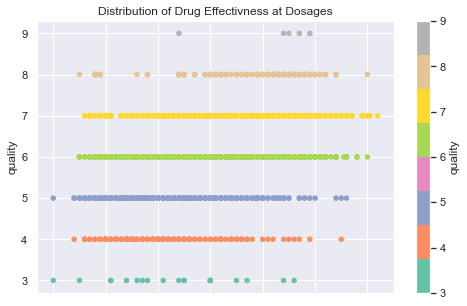

In [362]:
plt = df.plot.scatter(x='alcohol', y = "quality", c='quality', colormap='Set2', 
                      s = 20, figsize=(8,5), title = "Distribution of Drug Effectivness at Dosages", legend = False)

This graph shows the relationship between the alcohol content and the rating it receives. Looking at this there is not relationship between the two. It appears that people like wine for reasons other than the alcohol content. 

In [363]:
print("These are the unique values for ratings people gave: ", df["quality"].unique(), ".",\
      "\nThe bottom two (1, 2) and the highest rating (10) do not appear in this datastet.")
print(df["quality"].unique())

These are the unique values for ratings people gave:  [6 5 7 8 4 3 9] . 
The bottom two (1, 2) and the highest rating (10) do not appear in this datastet.
[6 5 7 8 4 3 9]


In [364]:
#convert the ratings into a binary classification for "good" or "bad" wine.
df["Good"] = [1 if x > 6 else 0 for x in df["quality"]]
df = df.drop(["quality"], axis = 1)

#drop any null values ofr any of the columns
df = df.dropna() 

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Good
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [365]:
#gathering the breakdown of the classes
num_Rated_good = len(df[df["Good"] == 1])
num_Rated_bad = len(df[df["Good"] == 0])

print("The number of data points we have that are labeled a good wine are: ", num_Rated_good, \
      "\nThe number of data points we have that are labeled a bad wine are: ", num_Rated_bad, \
      "\n\nThe percentage of out dataset with the 'good wine' label is: ", \
      num_Rated_good / (num_Rated_good + num_Rated_bad), \
     "\n\nSince the ratio of good wine data points to bad wine data points is: ", num_Rated_good / num_Rated_bad, \
     "we should undersample the 'bad wine' data points to have an even split.")

The number of data points we have that are labeled a good wine are:  1060 
The number of data points we have that are labeled a bad wine are:  3838 

The percentage of out dataset with the 'good wine' label is:  0.21641486320947326 

Since the ratio of good wine data points to bad wine data points is:  0.2761855132881709 we should undersample the 'bad wine' data points to have an even split.


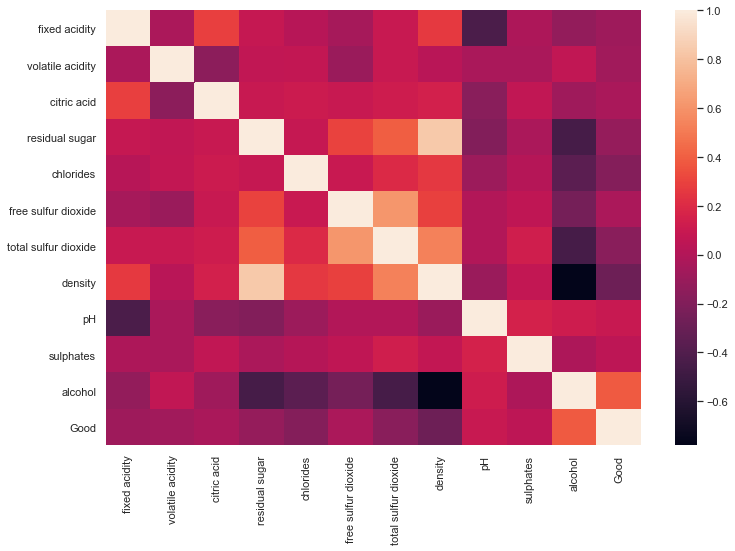

In [366]:
#see if there is any correlation between any of the features
corr = df.corr() 

sns.set(rc={'figure.figsize':(12,8)})
heatmap = sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

This matrix shows us that each feature is pretty evenly not correlated to each other. 

### Train Test Split with undersampling 

In [367]:
# Create the training set (75%)
train_set = df[0:int(len(df) * .75)] 
train_good = train_set[train_set['Good'] == 1] 
train_bad = train_set[train_set['Good'] == 0]
print('This dataset has', len(train_good) ,\
      "good wines so we will undersample the bad wines to have the same amount.")

bad_sample = train_bad.sample(len(train_good))
train = train_good.append(bad_sample) 
train = train.sample(frac=1)

This dataset has 840 good wines so we will undersample the bad wines to have the same amount.


In [368]:
# creating the feature vector and labels
x_train = train.drop(['Good'],axis=1) 
y_train = train['Good'] 

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [369]:
#Create the testing set (25%)
test = df[int(len(df) * .75):]

x_test = test.drop(['Good'],axis=1)
y_test = test['Good']
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

### SVM Model with Linear Kernel

In [370]:
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train) 

SVC(kernel='linear')

In [371]:
#calculate the predictions and generate confusion matrix
prediction_SVM_b_all = classifier.predict(x_test) 
cm = confusion_matrix(y_test, prediction_SVM_b_all)

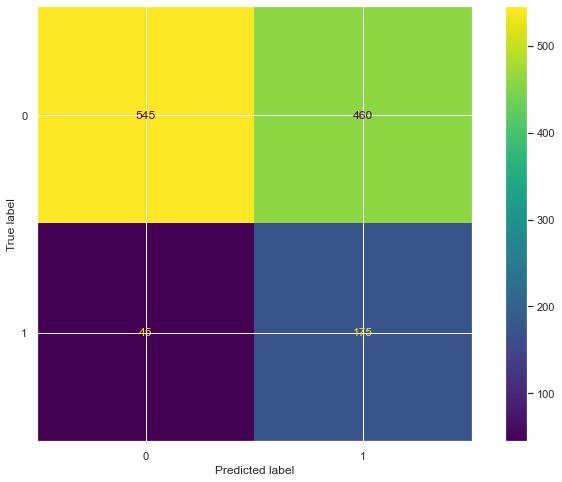

In [372]:
matrix = sklearn.metrics.plot_confusion_matrix(classifier, x_test, y_test)

In [373]:
precision = cm[1][1] / (cm[1][1] + cm[0][1])
recall = cm[1][1] / (cm[1][1] + cm[1][0])
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])

print("Precision is: ", precision)
print("Recall is: ", recall)
print("Accuracy is: ", accuracy)

Precision is:  0.2755905511811024
Recall is:  0.7954545454545454
Accuracy is:  0.5877551020408164


The above model has a pretty low accuracy. It also predicts many more trues than exist.

To try and fix the above set we will add class weights that favor the negatives. We do this because we find that there is no real correlation between the features.

In [374]:
classifier = svm.SVC(kernel='linear',class_weight={0:0.70, 1:0.30})
classifier.fit(x_train, y_train) 

SVC(class_weight={0: 0.7, 1: 0.3}, kernel='linear')

In [375]:
#calculate the predictions and generate confusion matrix
prediction_SVM_b_all = classifier.predict(x_test) 
cm = confusion_matrix(y_test, prediction_SVM_b_all)

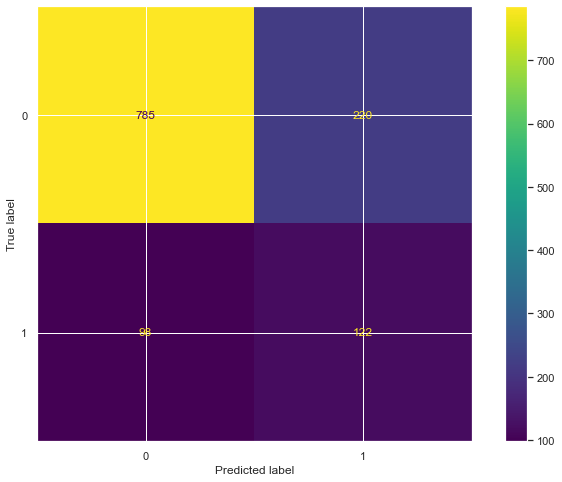

In [376]:
matrix = sklearn.metrics.plot_confusion_matrix(classifier, x_test, y_test)

In [377]:
precision = cm[1][1] / (cm[1][1] + cm[0][1])
recall = cm[1][1] / (cm[1][1] + cm[1][0])
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])

print("Precision is: ", precision)
print("Recall is: ", recall)
print("Accuracy is: ", accuracy)

Precision is:  0.3567251461988304
Recall is:  0.5545454545454546
Accuracy is:  0.7404081632653061


Adding more weight to the negative class seems to have helped our accuracy since the original classifier had a large number of incorrectly predicted non-good wine.  